**Brain Tumor Detection using EffNet**

**Overview**

This repository contains code for detecting Brain Tumor using a deep learning model based on the EffNet architecture. Brain Tumor is a medical condition characterized by an abnormal growth of cells within the brain. The model is trained to classify images into four categories: glioma_tumor, meningioma_tumor, no_tumor & pituitary_tumor.

**Workflow**

1) Mounting Drive: This block mounts Drive to access the dataset stored there.

2) Fetching Directories: Fetches directories for the train, test, and validation datasets.

3) Fetching Data: Loads data from the train, test, and validation directories.

4) Data Inspection: Displays sample images from the dataset to ensure successful access.

5) Data Augmentation: Augments the dataset to increase its size, rescales images, and sets batch size. Shuffle is set to false for consistency in training. 

6) Importing Pre-trained Model: Imports the pre-trained model.

7) Freezing Layers: Freezes the weights of the pre-trained layers.

8) Modifying Last Layer: Modifies the last layer of the model for classification.

9) Model Summary: Displays a summary of the modified model architecture.

10) Training with Callbacks: Trains the model using callbacks for early stopping and saving the best model based on improved accuracy.

11) Saving Model: Saves the trained model.

12) Prediction: Uses the trained model to predict.

13) Training without Early Stopping: Trains the model without early stopping.

14) Saving Model: Saves the trained model without early stopping.

15) Plotting Model Loss: Plots the loss curve during model training.

16) Plotting Model Accuracy: Plots the accuracy curve during model training.

17) Calculating Precision, Recall, and F1 Score: Computes precision, recall, and F1 score metrics for model evaluation.

18) Confusion Matrix (Test Set): Generates a confusion matrix for the test dataset.

19) Misclassification Analysis (Test Images): Analyzes misclassified images from the test dataset.

20) Confusion Matrix (Train Set): Generates a confusion matrix for the train dataset.

21) Misclassification Analysis (Train Images): Analyzes misclassified images from the train dataset.

22) Confusion Matrix (Validation Set): Generates a confusion matrix for the validation dataset.

23) Misclassification Analysis (Validation Images): Analyzes misclassified images from the validation dataset.

**Dependencies**

1) TensorFlow
2) Keras
3) NumPy
4) Matplotlib

**Usage**

1) Clone the repository.
2) Set up your environment with the required dependencies.
3) Follow the provided Jupyter Notebook or Python scripts for step-by-step execution.

**Dataset**

The dataset used in this project is stored in Google Drive. (Dataset source -> Kaggle).


**Author: Love Kumar Yadav**

**Fetching directories in variables train_dsr & test_dir**

In [85]:
import os
from sklearn.model_selection import train_test_split  #train_test_split function to control the percentage of the validation set.

base_dir = 'Brain Tumor Classification (MRI)__dataset'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Directory with our training Glioma pictures
train_gbt_dir = os.path.join(train_dir, 'glioma_tumor')

# Directory with our training meningioma pictures
train_mbt_dir = os.path.join(train_dir, 'meningioma_tumor')

# Directory with our training notumor pictures
train_nbt_dir = os.path.join(train_dir, 'no_tumor')

# Directory with our training pituitary pictures
train_pbt_dir = os.path.join(train_dir, 'pituitary_tumor')

# Directory with our testing Glioma pictures
test_gbt_dir = os.path.join(test_dir, 'glioma_tumor')

# Directory with our testing meningioma pictures
test_mbt_dir = os.path.join(test_dir, 'meningioma_tumor')

# Directory with our testing notumor pictures
test_nbt_dir = os.path.join(test_dir, 'notumor_tumor')

# Directory with our testing pituitary pictures
test_pbt_dir = os.path.join(test_dir, 'pituitary_tumor')


**Create a validation images dataset by taking 25% of the Trainning dataset**

In [86]:

base_dir = 'Brain Tumor Classification (MRI)__dataset'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
validation_dir = os.path.join(base_dir, 'Validation')  #we dont have validation dataset before...

#we split it from trainning... running it several time each time dataset is moving and due to that each time +25% is added,,,,
# so i have add this pieces of code to remove the previous data from the directory so that no more than 25% data will moved from there.

# Move all validation images back to the training set
for class_name in os.listdir(validation_dir):
    class_dir = os.path.join(validation_dir, class_name)
    for image_name in os.listdir(class_dir):
        source_path = os.path.join(class_dir, image_name)
        destination_path = os.path.join(train_dir, class_name, image_name)

        try:
            os.rename(source_path, destination_path)
            print(f"Moved: {source_path} to {destination_path}")
        except Exception as e:
            print(f"Error: {e}")

# Split the data into training and validation sets (0.20 means getting 20% of data for validation)
all_train_images = []
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    all_train_images.extend([os.path.join(class_name, fname) for fname in os.listdir(class_dir)])

train_images, val_images = train_test_split(all_train_images, test_size=0.20, random_state=42)

# Create validation directories if they don't exist
os.makedirs(validation_dir, exist_ok=True)
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(validation_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

# Move validation images to the validation directories
for image in val_images:
    print("Image:", image)  # Add this line to see the content of image variable

    class_name, image_name = image.split("\\")  # Use backslashes for splitting
    source_path = os.path.join(train_dir, class_name, image_name)
    destination_path = os.path.join(validation_dir, class_name, image_name)

    try:
        os.rename(source_path, destination_path)
        print(f"Moved: {source_path} to {destination_path}")
    except Exception as e:
        print(f"Error: {e}")


Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (125).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (125).jpg
Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (126).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (126).jpg
Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (128).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (128).jpg
Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (138).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (138).jpg
Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (139).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (139).jpg
Moved: Brain Tumor Classification (MRI)__dataset\Validation\glioma_tumor\gg (14).jpg to Brain Tumor Classification (MRI)__dataset\Training\glioma_tumor\gg (14).jpg
Moved:

**Checking the no. of data contained by each class**

In [87]:
import os

def count_images_in_directory(directory):
    return sum([len(files) for root, dirs, files in os.walk(directory)])

def count_images_per_class(directory):
    classes = os.listdir(directory)
    class_counts = {}

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_count = count_images_in_directory(class_path)
            class_counts[class_name] = class_count

    return class_counts

# Directory paths
train_dir = 'Brain Tumor Classification (MRI)__dataset\Training'
validation_dir = 'Brain Tumor Classification (MRI)__dataset\Validation'
test_dir = 'Brain Tumor Classification (MRI)__dataset\Testing'

# Count original images per class
train_class_counts = count_images_per_class(train_dir)
validation_class_counts = count_images_per_class(validation_dir)
test_class_counts = count_images_per_class(test_dir)

# Display the counts per class with class names
print("Number of original training images per class:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original validation images per class:")
for class_name, count in validation_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nNumber of original test images per class:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")


Number of original training images per class:
glioma_tumor: 647 images
meningioma_tumor: 653 images
no_tumor: 325 images
pituitary_tumor: 671 images

Number of original validation images per class:
glioma_tumor: 179 images
meningioma_tumor: 169 images
no_tumor: 70 images
pituitary_tumor: 156 images

Number of original test images per class:
glioma_tumor: 100 images
meningioma_tumor: 115 images
no_tumor: 105 images
pituitary_tumor: 74 images


**Showing some fetched data**

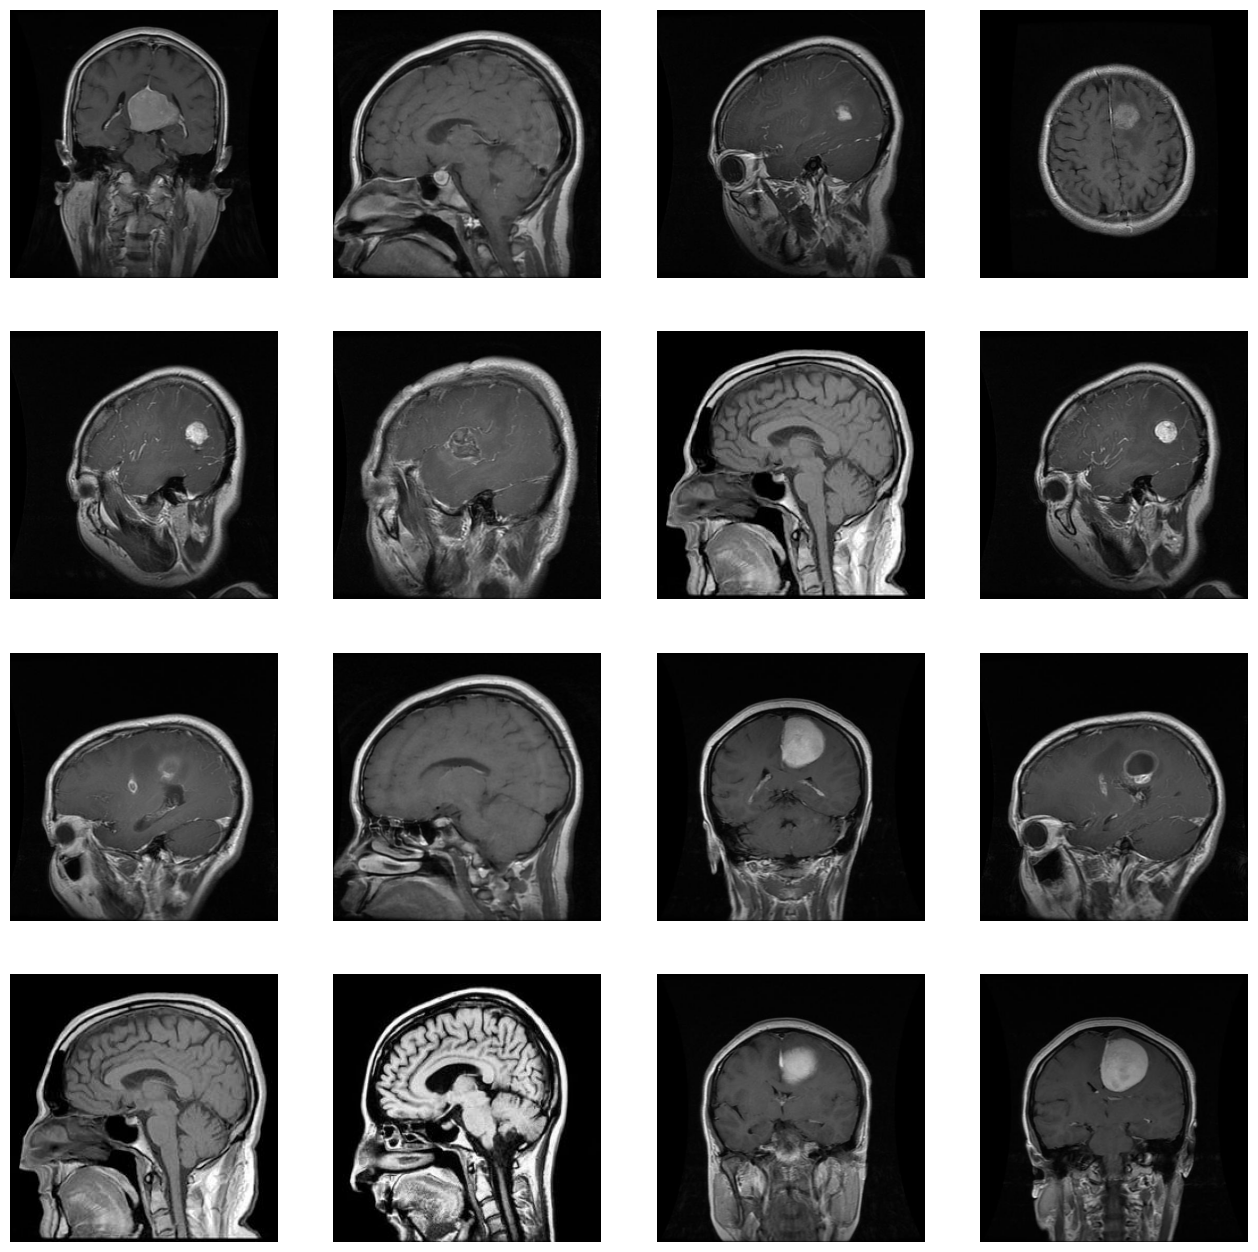

In [88]:
# Set up matplotlib fig, and size it to fit 4x4 pics
# Display sample images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_gbt_fnames = os.listdir(train_gbt_dir)
train_mbt_fnames = os.listdir(train_mbt_dir)
train_nbt_fnames = os.listdir(train_nbt_dir)
train_pbt_fnames = os.listdir(train_pbt_dir)

# Combine the image paths
all_image_paths = (
    [os.path.join(train_gbt_dir, fname) for fname in train_gbt_fnames[pic_index-8:pic_index]] +
    [os.path.join(train_mbt_dir, fname) for fname in train_mbt_fnames[pic_index-8:pic_index]] +
    [os.path.join(train_nbt_dir, fname) for fname in train_nbt_fnames[pic_index-8:pic_index]] +
    [os.path.join(train_pbt_dir, fname) for fname in train_pbt_fnames[pic_index-8:pic_index]]
)

# Shuffle the image paths
random.shuffle(all_image_paths)

# Display only 16 images or fewer
for i, img_path in enumerate(all_image_paths[:16]):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


**Data Augmentation to make more photos**

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator settings
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2,  # Add height shift
    brightness_range=[0.4, 1.2],  # Adjust brightness
    fill_mode='nearest'
)


valid_datagen = ImageDataGenerator(rescale=1./255)   #Normalization

test_datagen = ImageDataGenerator(rescale=1./255)    #Noemalization

# Training Set
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=20,
                                             class_mode='categorical')

# Validation Set
valid_set = valid_datagen.flow_from_directory(validation_dir,
                                              target_size=(224, 224),
                                              batch_size=20,
                                              class_mode='categorical',
                                              shuffle=False)

# Test Set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=20,
                                            class_mode='categorical',
                                            shuffle=False)


Found 2296 images belonging to 4 classes.
Found 574 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [90]:
label_dict = train_set.class_indices
tumor_type = list(label_dict.keys())
images,labels=next(train_set)

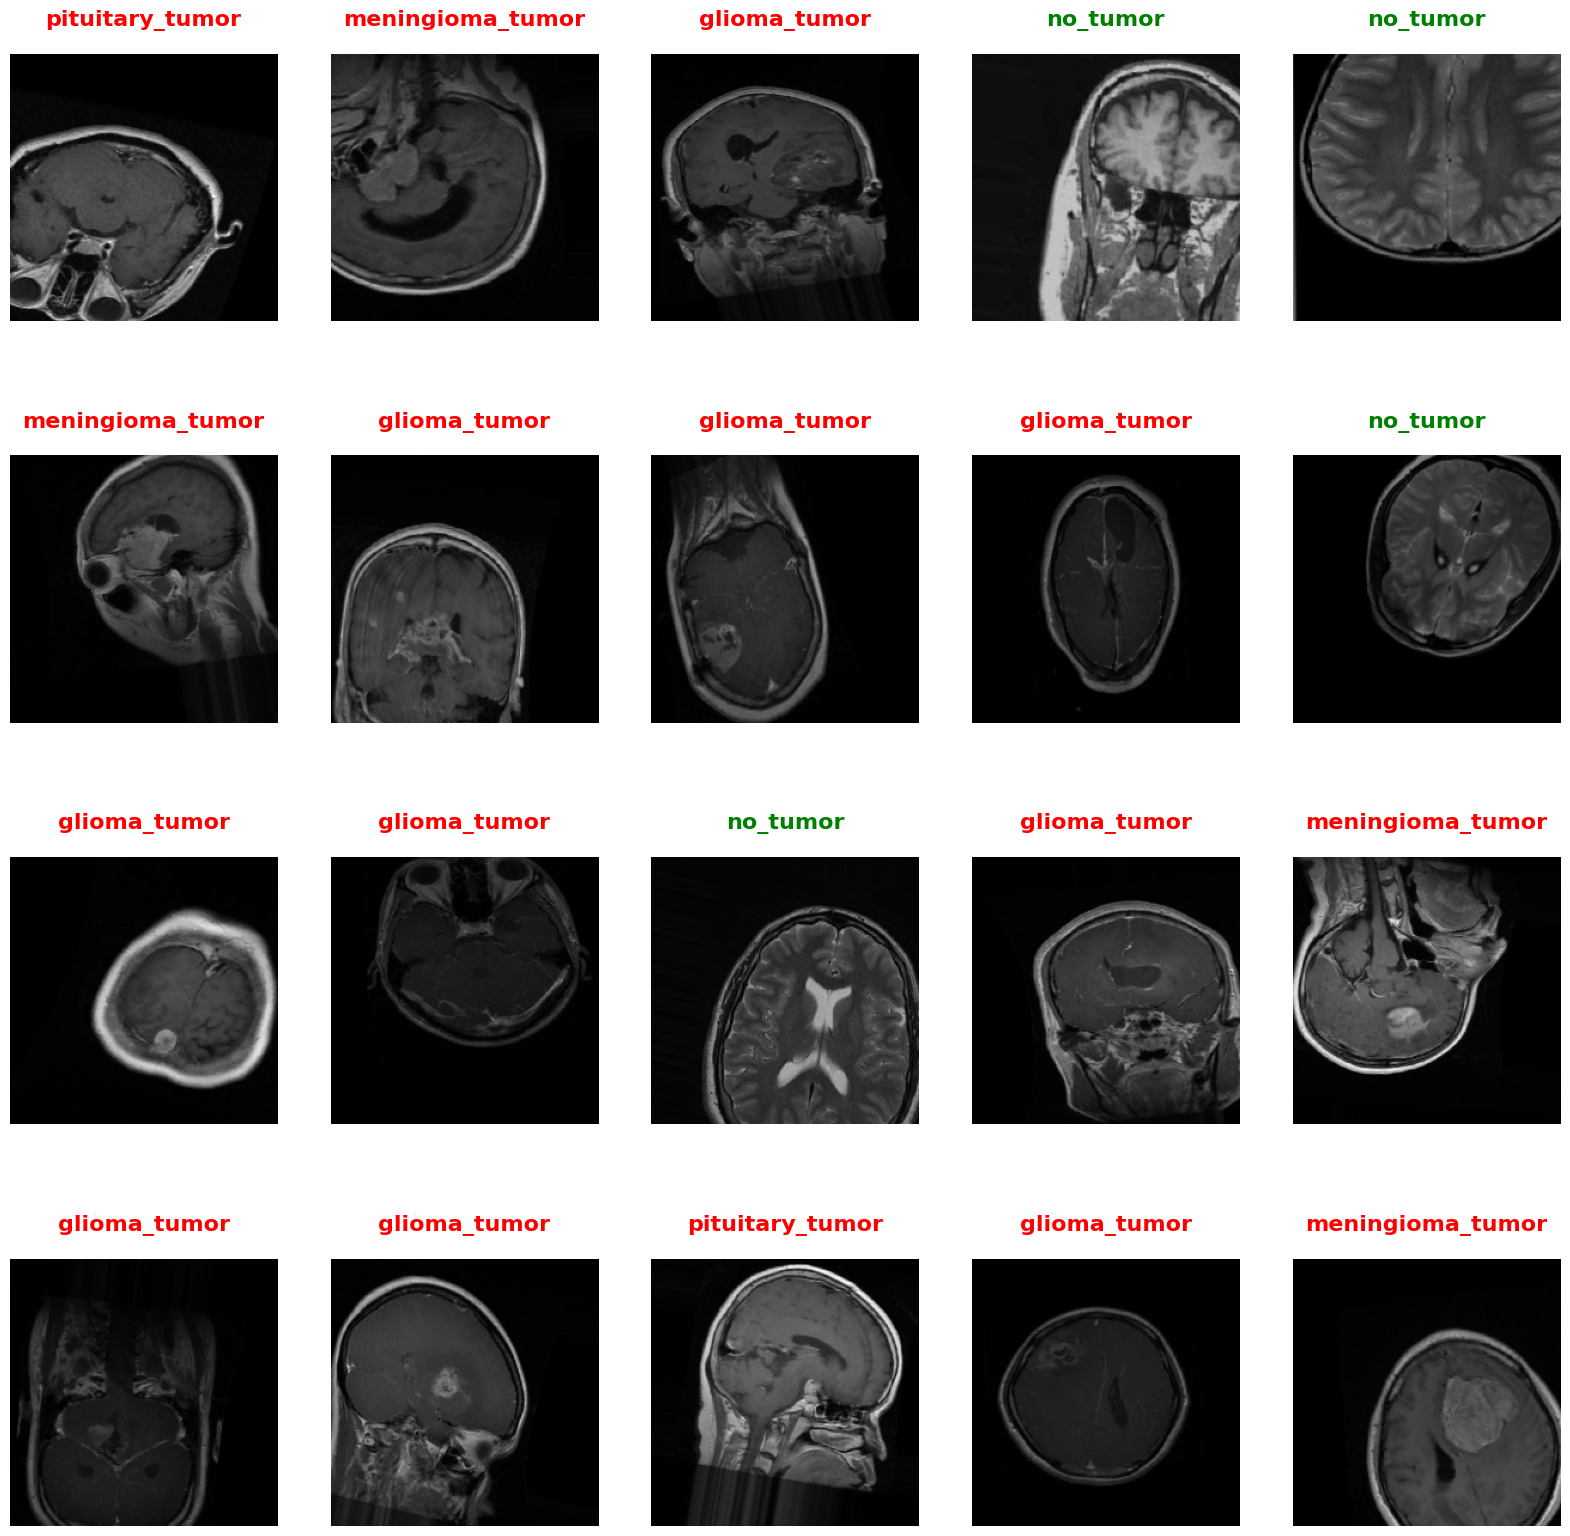

In [91]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
rcParams['axes.titlepad'] = 20

for i in range(20):
    plt.subplot(4, 5, i + 1)
    image = images[i]  # No normalization needed if already in range 0-1
    plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
    index = np.argmax(labels[i])
    tumor_type_name = tumor_type[index]
    color = 'green' if tumor_type_name == 'no_tumor' else 'red'
    plt.title(tumor_type_name, fontsize=16, fontweight='bold', color=color)
    plt.axis('off')

plt.show()



In [92]:
# Fixing the seed for random number generators
import random
from keras.backend import clear_session
import numpy as np
import tensorflow as tf

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [93]:
pip install efficientnet


Note: you may need to restart the kernel to use updated packages.


In [94]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from efficientnet.tfkeras import EfficientNetB0  # Assuming you're using the EfficientNet from the TensorFlow Hub


effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs=model)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [95]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]']       

In [96]:
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("Brain_tumor_effnet.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001, mode='auto', verbose=1)

# Assuming you have X_train and y_train defined
history = model.fit(train_set, epochs=12, validation_data=valid_set, callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/12
115/115 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7962
Epoch 1: val_accuracy improved from -inf to 0.81882, saving model to Brain_tumor_effnet.h5


c:\Users\Somna\OneDrive\Desktop\newskin\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


115/115 [==============================] - 244s 2s/step - loss: 0.5409 - accuracy: 0.7962 - val_loss: 0.6456 - val_accuracy: 0.8188 - lr: 0.0010
Epoch 2/12
115/115 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.8820
Epoch 2: val_accuracy improved from 0.81882 to 0.88850, saving model to Brain_tumor_effnet.h5
115/115 [==============================] - 208s 2s/step - loss: 0.3164 - accuracy: 0.8820 - val_loss: 0.3313 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 3/12
115/115 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.8998
Epoch 3: val_accuracy did not improve from 0.88850
115/115 [==============================] - 218s 2s/step - loss: 0.2631 - accuracy: 0.8998 - val_loss: 0.4134 - val_accuracy: 0.8798 - lr: 0.0010
Epoch 4/12
115/115 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.9220
Epoch 4: val_accuracy improved from 0.88850 to 0.93554, saving model to Brain_tumor_effnet.h5
115/115 [=============================

**Model Loss Plotting**

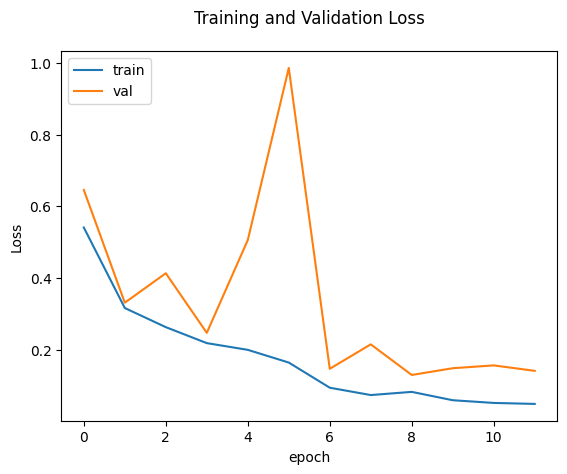

In [97]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model Accuracy Plotting**

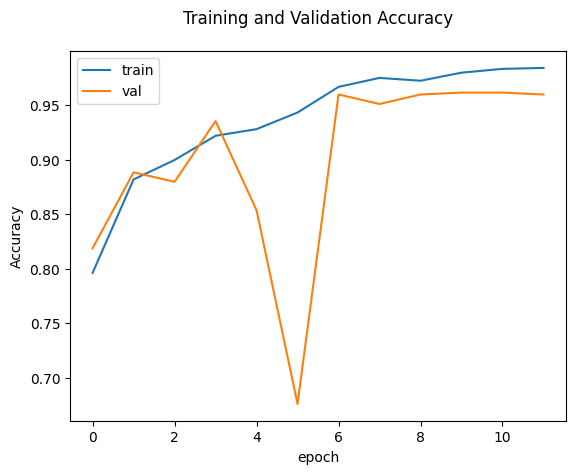

In [98]:
import keras
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Precision, Recall, F1Score**

In [99]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the test set generator
test_set.reset()

# Predict probabilities for the test set
y_pred_proba = model.predict(test_set)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Calculate precision
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


20/20 [==============================] - 9s 318ms/step
Test Accuracy: 0.799492385786802
Precision: 0.8499445469564744
Recall: 0.799492385786802
F1 Score: 0.7745515591805532


**Confusion Matrix of Test Set**

In [100]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

C:\Users\Somna\AppData\Local\Temp\ipykernel_15612\769506795.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [101]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

**Missclassification Test Images**

In [102]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 329


In [103]:
pip install seaborn

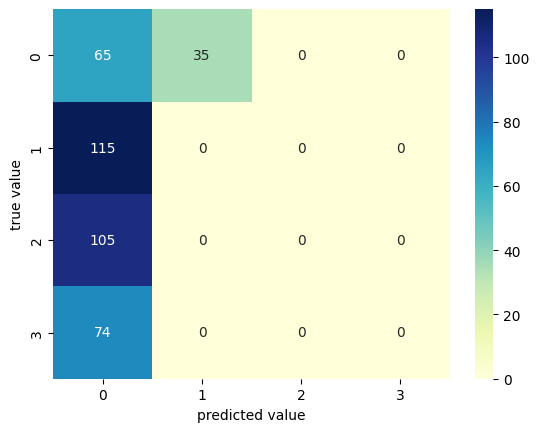

In [104]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Confusion Matrix of Train Set**

In [105]:
import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

C:\Users\Somna\AppData\Local\Temp\ipykernel_15612\1897391606.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [106]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [107]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 1627


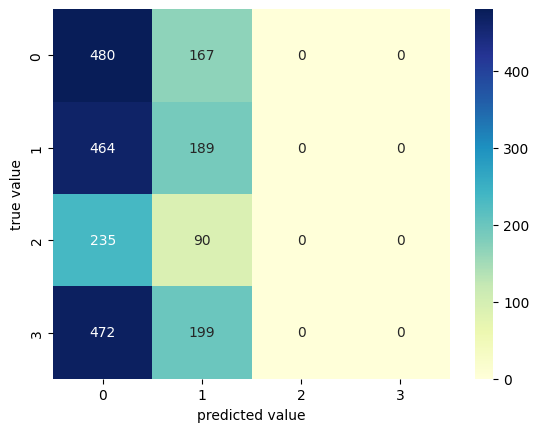

In [108]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**confusion matrix of validation set**

In [109]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

C:\Users\Somna\AppData\Local\Temp\ipykernel_15612\4155108745.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [110]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [111]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 570


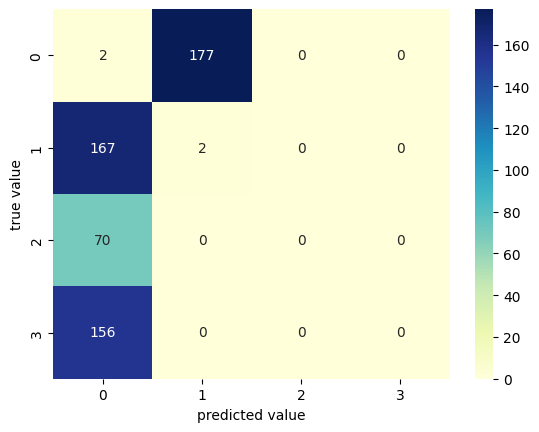

In [112]:
#Prediction of valid set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

**Prediction**

1/1 [==============================] - 2s 2s/step


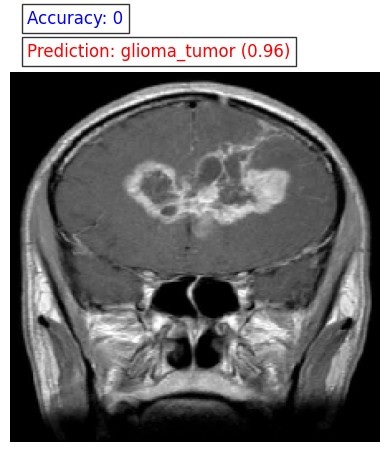

In [113]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
img1 = image.load_img('Brain Tumor Classification (MRI)__dataset\Testing\glioma_tumor\image.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Map prediction probabilities to class names
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
predicted_class_probability = prediction[0][predicted_class_index]

# Assuming you have the ground truth label for the image
ground_truth_label = 'no_tumor'  # Replace this with the actual ground truth label
accuracy = 1 if predicted_class_name == ground_truth_label else 0

# Display the image with prediction
plt.imshow(img1)
plt.axis('off')

# Display prediction label with probability and accuracy
plt.text(10, -10, f'Prediction: {predicted_class_name} ({predicted_class_probability:.2f})', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(10, -30, f'Accuracy: {accuracy}', color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()
